
berta - Finetuned on the TWITTER DATASET + ZERO SHOT FOR UCI



# THIS IS THE FILE FOR PURE BERTA  ON UCI SENTIMENT ANALYSIS - ZERO SHOT


In [2]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [3]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [4]:
!pip install transformers

     |████████████████████████████████| 2.1MB 20.7MB/s 
     |████████████████████████████████| 901kB 52.3MB/s 
     |████████████████████████████████| 3.3MB 56.1MB/s 


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=6eed06f7631531a3b7698cb0819b4786458a9ab87dbf06d8d17b223e7427bfdd
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## Steps for downloading the dataset




In [5]:
#Adding the datasets to the collab file

#First we mount the google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [6]:

# with open('/content/drive/My Drive/Undergraduate/Courses/MLLU Project/Code/Baseline - Draft Proposal/yelp_labelled.txt', 'r') as f:
#   f.write('Successfully opened Yelp Labelled')

with open('/content/drive/MyDrive/BASELINES/yelp_labelled.txt', 'r') as y:
  print("Successfully Opened Yelp")


with open('/content/drive/MyDrive/BASELINES/amazon_cells_labelled.txt', 'r') as a:
  print("Successfully Opened Amazon Labelled")



with open('/content/drive/MyDrive/BASELINES/imdb_labelled.txt', 'r') as i:
  print("Successfully Opened IMDB Labelled") 



Successfully Opened Yelp
Successfully Opened Amazon Labelled
Successfully Opened IMDB Labelled


In [7]:
#Checking on the Yelp Dataframe
import pandas as pd
df1_yelp = pd.read_csv('/content/drive/MyDrive/BASELINES/yelp_labelled.txt', delimiter = '\t', delim_whitespace= False, names = ('Sentence', 'Label'))
df1_yelp.head()

print(df1_yelp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sentence  1000 non-null   object 
 1   Label     0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
None


In [8]:
#Similarly for the dataframes for Amazon and IMDB
df1_amazon = pd.read_csv('/content/drive/MyDrive/BASELINES/amazon_cells_labelled.txt', delimiter = '\t', delim_whitespace= False, names = ('Sentence', 'Label'))
df1_amazon.head()
print(df1_amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1000 non-null   object
 1   Label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [9]:
df1_imdb = pd.read_csv('/content/drive/MyDrive/BASELINES/imdb_labelled.txt', delimiter = '\t', delim_whitespace= False, names = ('Sentence', 'Label'))
df1_imdb.head()
print(df1_imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  748 non-null    object
 1   Label     748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None


In [10]:
combinedDF = pd.concat([df1_imdb, df1_amazon, df1_yelp], axis = 0, join = 'inner')
combinedDF.head()
combinedDF.info()
combinedDF.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sentence  2748 non-null   object 
 1   Label     1748 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.4+ KB


,Sentence,Label
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0
5,"The rest of the movie lacks art, charm, meanin...",0.0
6,Wasted two hours.,0.0
7,Saw the movie today and thought it was a good ...,1.0
8,A bit predictable.,0.0
9,Loved the casting of Jimmy Buffet as the scien...,1.0


In [11]:

#shuffled

combinedDF = combinedDF.sample(frac = 1).reset_index(drop = True)
combinedDF = combinedDF.dropna()
combinedDF.info()
combinedDF.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 0 to 2746
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sentence  1748 non-null   object 
 1   Label     1748 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.0+ KB


,Sentence,Label
0,It's a case of 'so bad it is laughable'.,0.0
2,A cheap and cheerless heist movie with poor ch...,0.0
4,I give Wirefly 1 star.I will contact Cingular/...,0.0
6,I was very pleased to see that I could replace...,1.0
7,The kids are annoying.,0.0
10,Lewis Black's considerable talent is wasted he...,0.0
12,"Saggy, floppy piece of junk.",0.0
14,Just reading on the specs alone makes you say ...,1.0
17,The story is also both funny and poignant at t...,1.0
19,"Both films are terrible, but to the credit of ...",0.0


## NOW WE IMPORT THE MAIN DATASET

In [12]:
#twitter dataset 

In [13]:
df1_twitter = pd.read_csv('/content/drive/MyDrive/BASELINES/train (1).csv', names = ('Label', 'Sentence'))
df1_twitter = df1_twitter.iloc[1:4000]

df1_twitter['Label'] = df1_twitter['Label'].astype(int, errors = 'raise')

In [14]:
df1_twitter.head()
df1_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 3999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     3999 non-null   int64 
 1   Sentence  3999 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.7+ KB


In [15]:
df1_twitter.head(10)

,Label,Sentence
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...
10,0,@user @user welcome here ! i'm it's so #gr...


In [16]:
sentences = df1_twitter.Sentence.values
labels = df1_twitter.Label.values

print(type(labels[0]))



<class 'numpy.int64'>


###Downloading this on the Twitter Dataset

In [17]:
from transformers import BertTokenizer
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Loading BERT tokenizer...


In [18]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Tokenized:  ['@', 'user', 'when', 'a', 'father', 'is', 'dysfunction', '##al', 'and', 'is', 'so', 'selfish', 'he', 'drag', '##s', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#', 'run']
Token IDs:  [1030, 5310, 2043, 1037, 2269, 2003, 28466, 2389, 1998, 2003, 2061, 14337, 2002, 8011, 2015, 2010, 4268, 2046, 2010, 28466, 1012, 1001, 2448]


In [19]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))


print(len(sentences))
print('Max sentence length: ', max_len)

3999
Max sentence length:  76


In [20]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Token IDs: tensor([  101,  1030,  5310,  2043,  1037,  2269,  2003, 28466,  2389,  1998,
         2003,  2061, 14337,  2002,  8011,  2015,  2010,  4268,  2046,  2010,
        28466,  1012,  1001,  2448,   102,     0,     0,     0,     0,     0,
            0,     0])


In [21]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
print(type(input_ids))
print(type(attention_masks))
print(type(labels))
# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
3,599 training samples
  400 validation samples


In [22]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. 
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

## Now we will import the DebertaForSequenceClassification with our own transformers directory on the Google Colab file. 


In [23]:
from transformers import BertForSequenceClassification, AdamW, DebertaConfig

In [24]:
"""

TESTING PERSONALIZED BERTA

"""


model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [25]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [26]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [27]:

import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [28]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [29]:
import random
import numpy as np
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
        
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )



print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:08.
  Batch    80  of    113.    Elapsed: 0:00:17.

  Average training loss: 0.21
  Training epcoh took: 0:00:23

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.14
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:08.
  Batch    80  of    113.    Elapsed: 0:00:17.

  Average training loss: 0.11
  Training epcoh took: 0:00:24

Running Validation...
  Accuracy: 0.97
  Validation Loss: 0.13
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:09.
  Batch    80  of    113.    Elapsed: 0:00:17.

  Average training loss: 0.06
  Training epcoh took: 0:00:24

Running Validation...
  Accuracy: 0.97
  Validation Loss: 0.13
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:08.
  Batch    80  of    113.    Elapsed: 0:

In [30]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.21,0.14,0.96,0:00:23,0:00:01
2,0.11,0.13,0.97,0:00:24,0:00:01
3,0.06,0.13,0.97,0:00:24,0:00:01
4,0.03,0.14,0.97,0:00:24,0:00:01


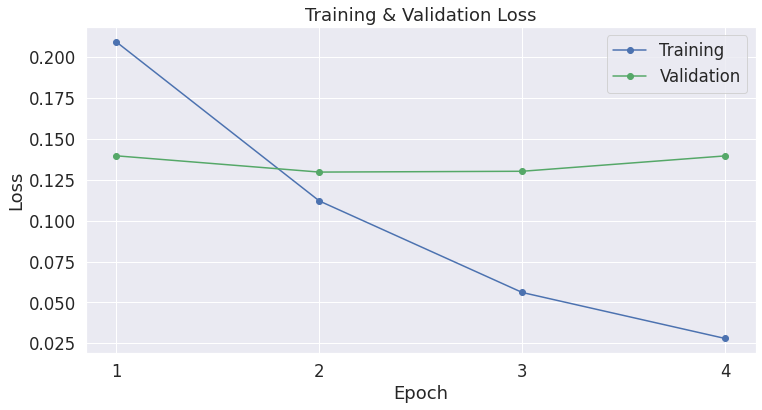

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [32]:
total_test_loss = []
total_test_accuracy = []



for batch in validation_dataloader:

        
  # Unpack this training batch from our dataloader. 
  #
  # As we unpack the batch, we'll also copy each tensor to the GPU using 
  # the `to` method.
  #
  # `batch` contains three pytorch tensors:
  #   [0]: input ids 
  #   [1]: attention masks
  #   [2]: labels 
  b_input_ids = batch[0].to(device)
  b_input_mask = batch[1].to(device)
  b_labels = batch[2].to(device)
        
  # Tell pytorch not to bother with constructing the compute graph during
  # the forward pass, since this is only needed for backprop (training).
  #with torch.no_grad():        

  # Forward pass, calculate logit predictions.
  # token_type_ids is the same as the "segment ids", which 
  # differentiates sentence 1 and 2 in 2-sentence tasks.
  result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)
        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
  loss = result.loss
  logits = result.logits
        
            
        # Accumulate the validation loss.
  total_test_loss = loss.item()

        # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
  total_test_accuracy = flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
print("The total test accuracy is: ")
print(total_test_accuracy)
print("Testing complete!")

The total test accuracy is: 
1.0
Testing complete!


#NOW AFTER TRAINING WE FINALLY CALCULATE THE ACCURACY ON THE RESERVED 100% DATASET

In [40]:


combinedDF['Label'] = combinedDF['Label'].astype(int, errors = 'raise')
sentences3 = combinedDF.Sentence.values
labels3 = combinedDF.Label.values


In [41]:
#We create the datasets from the dataframe using the input_ids and the attention masks

max_len3 = 0

# For every sentence...
for sent in sentences3:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids3 = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len3 = max(max_len3, len(input_ids3))

print('Max sentence length: ', max_len3)


Max sentence length:  1790


In [42]:
input_ids3 = []
attention_masks3 = []

# For every sentence...
for sent in sentences3:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict3 = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids3.append(encoded_dict3['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks3.append(encoded_dict3['attention_mask'])

# Convert the lists into tensors.
input_ids3 = torch.cat(input_ids3, dim=0)
attention_masks3 = torch.cat(attention_masks3, dim=0)
labels3 = torch.tensor(labels3)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences3[0])
print('Token IDs:', input_ids3[0])


print(len(sentences3))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  It's a case of 'so bad it is laughable'.  
Token IDs: tensor([ 101, 2009, 1005, 1055, 1037, 2553, 1997, 1005, 2061, 2919, 2009, 2003,
        4756, 3085, 1005, 1012,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])
1748


In [43]:
#Now we create the dataset
test_dataset = TensorDataset(input_ids3, attention_masks3, labels3)

print(type(input_ids3))        
print(type(attention_masks3))
print(type(labels3))



test_dataloader = DataLoader(        
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = 32 
        )


print(len(test_dataset))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
1748


In [37]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    2048 MB |    2972 MB |    1631 GB |    1629 GB |\n|       from large pool |    2028 MB |    2970 MB |    1619 GB |    1617 GB |\n|       from small pool |      20 MB |      38 MB |      12 GB |      12 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    2048 MB |    2972 MB |    1631 GB |    1629 GB |\n|       from large pool |    2028 MB |    2970 MB |

In [44]:
total_test_loss = []
total_test_accuracy = []



for batch in test_dataloader:

        
  # Unpack this training batch from our dataloader. 
  #
  # As we unpack the batch, we'll also copy each tensor to the GPU using 
  # the `to` method.
  #
  # `batch` contains three pytorch tensors:
  #   [0]: input ids 
  #   [1]: attention masks
  #   [2]: labels 
  b_input_ids = batch[0].to(device)
  b_input_mask = batch[1].to(device)
  b_labels = batch[2].to(device)
        
  # Tell pytorch not to bother with constructing the compute graph during
  # the forward pass, since this is only needed for backprop (training).
  #with torch.no_grad():        

  # Forward pass, calculate logit predictions.
  # token_type_ids is the same as the "segment ids", which 
  # differentiates sentence 1 and 2 in 2-sentence tasks.
  result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)
        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
  loss = result.loss
  logits = result.logits
        
            
        # Accumulate the validation loss.
  total_test_loss = loss.item()

        # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
  total_test_accuracy = flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
print("The total test accuracy is: ")
print(total_test_accuracy)
print("Testing complete!")

The total test accuracy is: 
0.55
Testing complete!
